In [52]:
# ===============================
# Stage 1: Data Preparation 
# ===============================

In [53]:
import pandas as pd

file_path = "HR_data.csv"  
df = pd.read_csv(file_path)

print("Initial Shape:", df.shape)

Initial Shape: (2000000, 12)


In [54]:
df = df.sample(n=10000, random_state=42)

In [55]:
print(df.head())

         Unnamed: 0 Employee_ID           Full_Name Department  \
1828401     1828401  EMP1828402     Tracie Galloway         IT   
1200071     1200071  EMP1200072        Amanda Smith         IT   
194849       194849  EMP0194850    Charles Thompson         IT   
1629054     1629054  EMP1629055      James Williams         HR   
191144       191144  EMP0191145  Mr. Jeffrey Snyder      Sales   

                             Job_Title   Hire_Date  \
1828401                DevOps Engineer  2022-06-13   
1200071              Software Engineer  2021-05-02   
194849               Software Engineer  2018-08-12   
1629054  Talent Acquisition Specialist  2011-10-03   
191144                 Account Manager  2022-06-07   

                                                  Location  \
1828401  Allisonfort, South Georgia and the South Sandw...   
1200071                  Andreaton, Bosnia and Herzegovina   
194849                           East Marisaton, Greenland   
1629054                       

In [56]:
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

In [57]:
if "Hire_Date" in df.columns:
    df["Hire_Date"] = pd.to_datetime(df["Hire_Date"], errors="coerce")

In [58]:
print("After Cleaning Shape:", df.shape)
print(df.info())

After Cleaning Shape: (10000, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1828401 to 689173
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Employee_ID         10000 non-null  object        
 1   Full_Name           10000 non-null  object        
 2   Department          10000 non-null  object        
 3   Job_Title           10000 non-null  object        
 4   Hire_Date           10000 non-null  datetime64[ns]
 5   Location            10000 non-null  object        
 6   Performance_Rating  10000 non-null  int64         
 7   Experience_Years    10000 non-null  int64         
 8   Status              10000 non-null  object        
 9   Work_Mode           10000 non-null  object        
 10  Salary_INR          10000 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 937.5+ KB
None


In [59]:
missing = df.isnull().sum()
missing

Employee_ID           0
Full_Name             0
Department            0
Job_Title             0
Hire_Date             0
Location              0
Performance_Rating    0
Experience_Years      0
Status                0
Work_Mode             0
Salary_INR            0
dtype: int64

In [60]:
# ===============================
# Stage 1B: Data Cleaning
# ===============================

In [61]:
# 2. Normalize categorical values
#    - Make Status consistent (Active/Resigned)
df["Status"] = df["Status"].str.strip().str.title()   

In [62]:
#    - Work_Mode consistency (On-site / Remote / Hybrid)
df["Work_Mode"] = df["Work_Mode"].str.strip().str.title()

# 3. Remove outliers in Salary (beyond 99th percentile)
upper_limit = df["Salary_INR"].quantile(0.99)
df = df[df["Salary_INR"] <= upper_limit]

In [63]:
df["Salary (M)"] = df["Salary_INR"] / 1000000

In [64]:
print(df[["Employee_ID", "Status", "Work_Mode", "Salary (M)", "Performance_Rating"]].head())

        Employee_ID  Status Work_Mode  Salary (M)  Performance_Rating
1828401  EMP1828402  Active    Remote    0.473938                   2
1200071  EMP1200072  Active   On-Site    1.066321                   2
194849   EMP0194850  Active   On-Site    0.622779                   4
1629054  EMP1629055  Active    Remote    0.947423                   3
191144   EMP0191145  Active    Remote    0.436052                   5


In [65]:
df = df.drop_duplicates(subset=["Employee_ID"], keep="first")
today = pd.Timestamp.today()
df = df[df["Hire_Date"] <= today]

In [66]:
df.describe()

,Hire_Date,Performance_Rating,Experience_Years,Salary_INR,Salary (M)
count,9900,9900.000000,9900.000000,9.900000e+03,9900.000000
mean,2020-01-29 06:01:01.090908928,2.984747,5.045152,8.828153e+05,0.882815
min,2010-08-17 00:00:00,1.000000,0.000000,3.003070e+05,0.300307
25%,2017-06-14 00:00:00,2.000000,2.000000,6.191228e+05,0.619123
50%,2020-08-01 12:00:00,3.000000,5.000000,8.117270e+05,0.811727
75%,2023-01-29 00:00:00,4.000000,8.000000,1.069373e+06,1.069373
max,2025-08-13 00:00:00,5.000000,15.000000,2.411758e+06,2.411758
std,NaN,1.410806,3.631790,3.599332e+05,0.359933


In [67]:
df = df[df["Performance_Rating"].between(1, 5)]

In [68]:
df["Department"] = df["Department"].str.strip().str.title()
df["Job_Title"] = df["Job_Title"].str.strip().str.title()

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

C:\Users\DELL\AppData\Local\Temp\ipykernel_12260\2415842817.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Status", order=status_counts.index, palette="viridis")


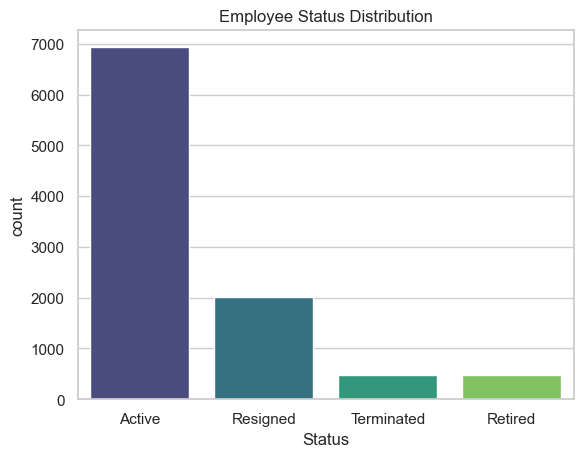

In [70]:
# 1. Distribution of Employee Status
status_counts = df["Status"].value_counts()
sns.countplot(data=df, x="Status", order=status_counts.index, palette="viridis")
plt.title("Employee Status Distribution")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12260\2756072538.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="Set2")


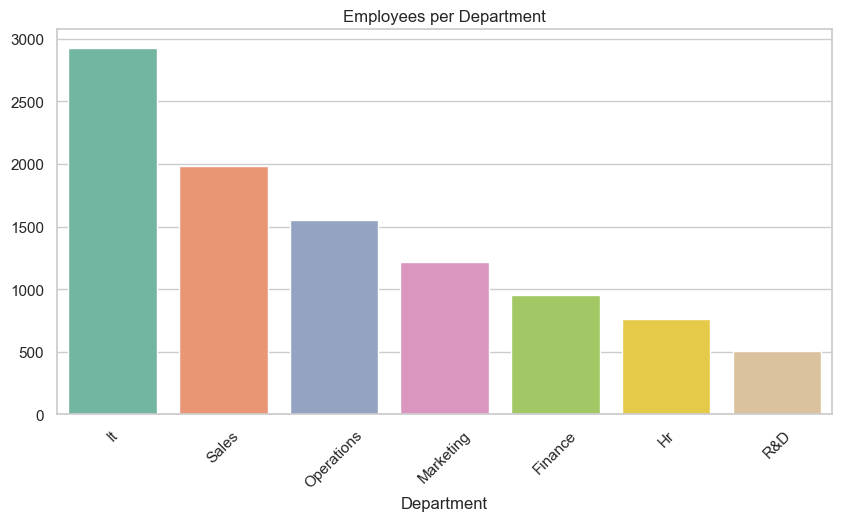

In [71]:
# 2. Employees per Department
dept_counts = df["Department"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=dept_counts.index, y=dept_counts.values, palette="Set2")
plt.xticks(rotation=45)
plt.title("Employees per Department")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12260\2213789355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Department", y="Salary (M)", palette="pastel")


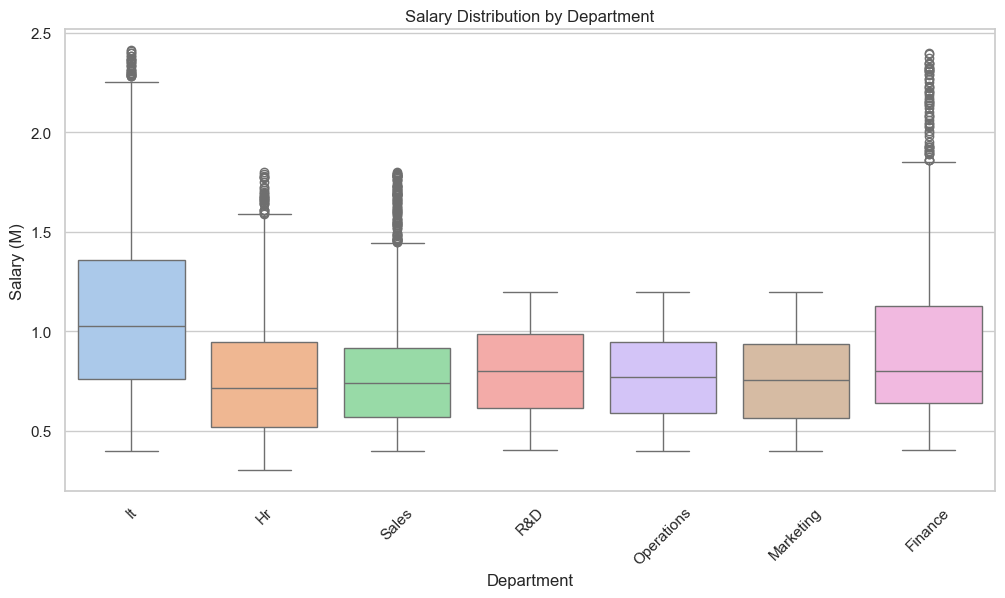

In [72]:
# 3. Salary by Department, Job Title, and Experience
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Department", y="Salary (M)", palette="pastel")
plt.xticks(rotation=45)
plt.title("Salary Distribution by Department")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12260\767601301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["Job_Title"].isin(top_titles)],


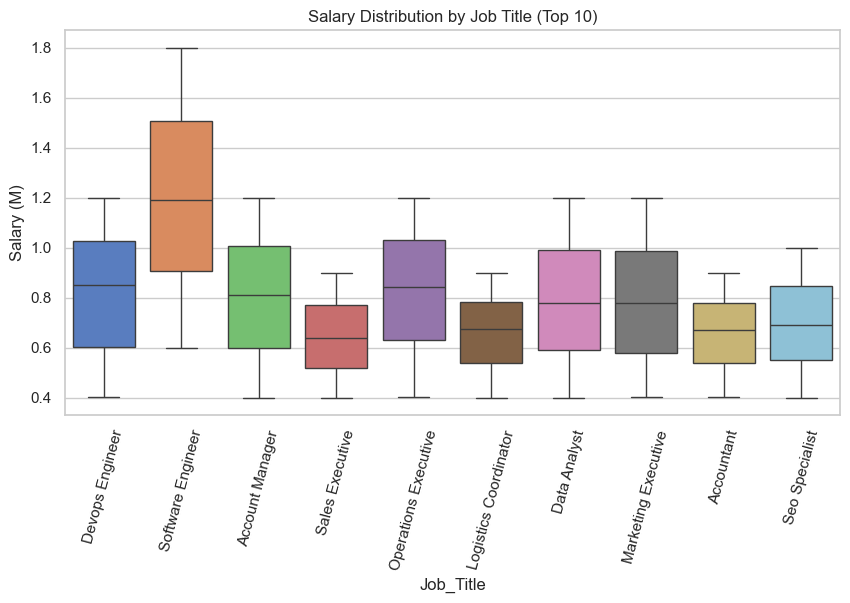

In [73]:
# Job Title Salary Distribution (Top 10 titles)
top_titles = df["Job_Title"].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df["Job_Title"].isin(top_titles)],
            x="Job_Title", y="Salary (M)", palette="muted")
plt.xticks(rotation=75)
plt.title("Salary Distribution by Job Title (Top 10)")
plt.show()

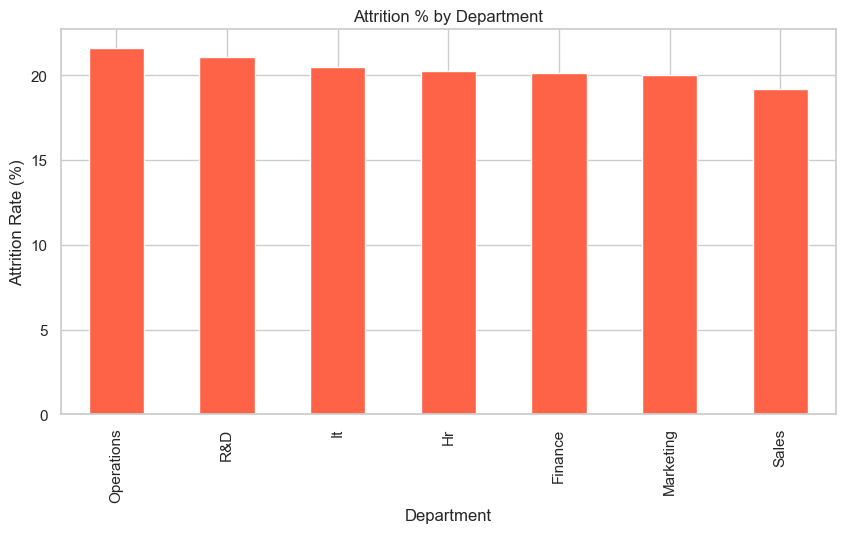

In [74]:
# 4. Attrition % by Department
attrition = (df[df["Status"]=="Resigned"]
             .groupby("Department")["Employee_ID"].count()
             / df.groupby("Department")["Employee_ID"].count()) * 100
attrition.sort_values(ascending=False).plot(kind="bar", figsize=(10,5), color="tomato")
plt.title("Attrition % by Department")
plt.ylabel("Attrition Rate (%)")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12260\1691930202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")


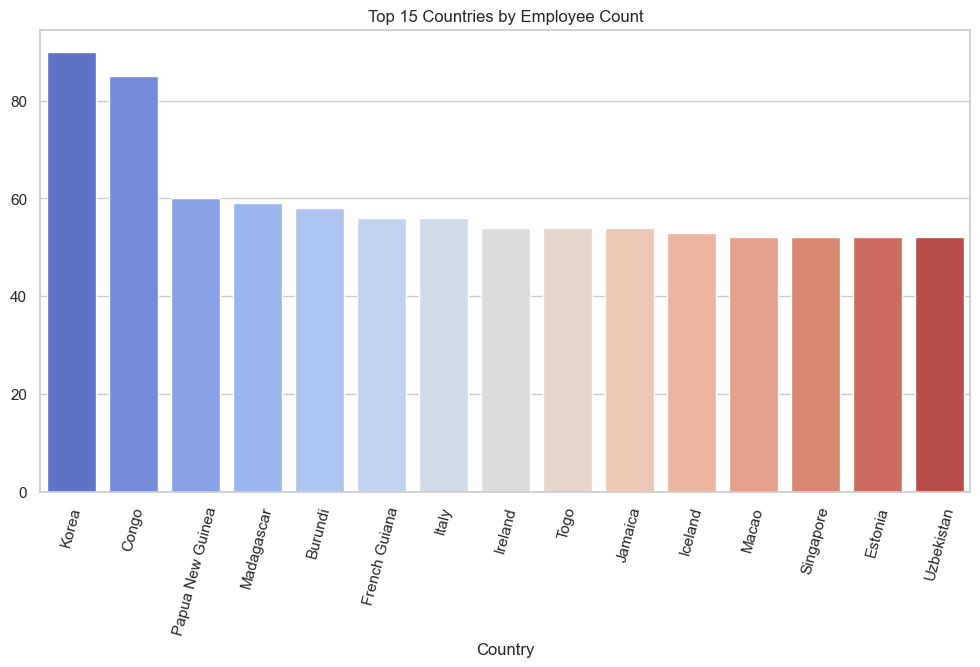

In [75]:
# 5. Country-level Employee Distribution
df["Country"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())
plt.figure(figsize=(12,6))
country_counts = df["Country"].value_counts().head(15)
sns.barplot(x=country_counts.index, y=country_counts.values, palette="coolwarm")
plt.xticks(rotation=75)
plt.title("Top 15 Countries by Employee Count")
plt.show()

In [76]:
# ===============================
#  Advanced Insights
# ===============================

C:\Users\DELL\AppData\Local\Temp\ipykernel_12260\3274185377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Performance_Rating", y="Salary (M)", palette="crest")


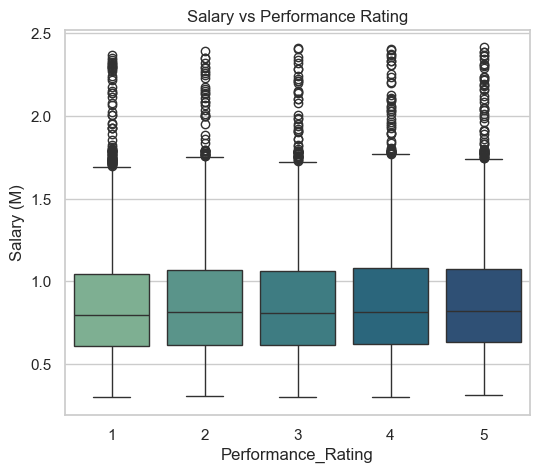


Correlation Matrix:
                     Salary (M)  Performance_Rating  Experience_Years
Salary (M)            1.000000            0.024601         -0.012649
Performance_Rating    0.024601            1.000000          0.001101
Experience_Years     -0.012649            0.001101          1.000000


In [77]:
# 1. Correlation: Salary vs Performance
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="Performance_Rating", y="Salary (M)", palette="crest")
plt.title("Salary vs Performance Rating")
plt.show()

corr = df[["Salary (M)", "Performance_Rating", "Experience_Years"]].corr()
print("\nCorrelation Matrix:\n", corr)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12260\3580379471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Work_Mode", y="Salary (M)", palette="Set3")


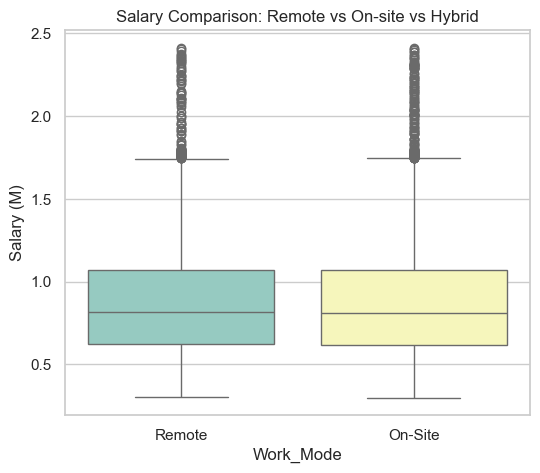


Salary Stats by Work Mode:
             count      mean       std       min       25%       50%       75%  \
Work_Mode                                                                       
On-Site    5941.0  0.881325  0.359925  0.300307  0.617127  0.807983  1.067869   
Remote     3959.0  0.885052  0.359979  0.300922  0.623036  0.818494  1.071000   

                max  
Work_Mode            
On-Site    2.408566  
Remote     2.411758  


In [78]:
# 2. Salary fairness: Remote vs On-site comparison
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="Work_Mode", y="Salary (M)", palette="Set3")
plt.title("Salary Comparison: Remote vs On-site vs Hybrid")
plt.show()

salary_mode_stats = df.groupby("Work_Mode")["Salary (M)"].describe()
print("\nSalary Stats by Work Mode:\n", salary_mode_stats)

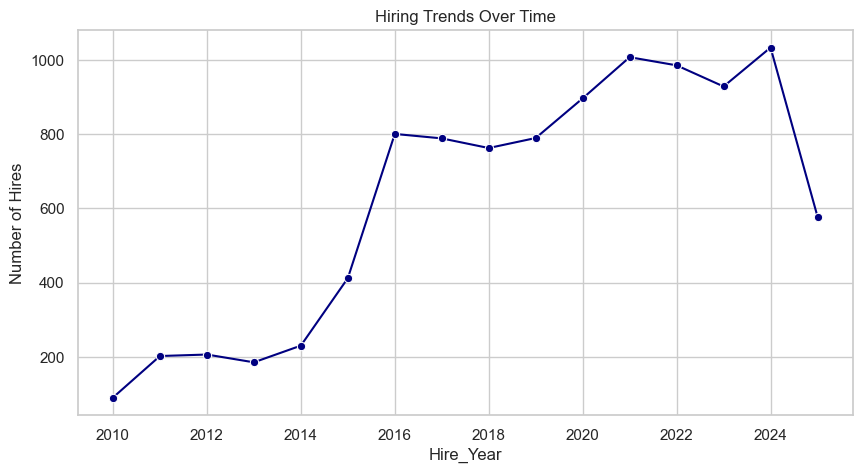

In [79]:
# 3. Hiring trends (hires per year)
df["Hire_Year"] = df["Hire_Date"].dt.year
hire_trends = df.groupby("Hire_Year")["Employee_ID"].count()

plt.figure(figsize=(10,5))
sns.lineplot(x=hire_trends.index, y=hire_trends.values, marker="o", color="navy")
plt.title("Hiring Trends Over Time")
plt.ylabel("Number of Hires")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12260\3385232172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Status", y="Experience_Years", palette="rocket")


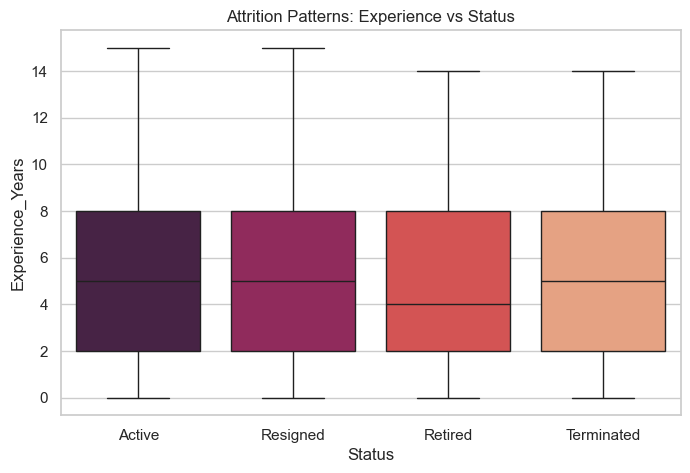

In [80]:
# 4. Attrition patterns (experience vs status)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Status", y="Experience_Years", palette="rocket")
plt.title("Attrition Patterns: Experience vs Status")
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


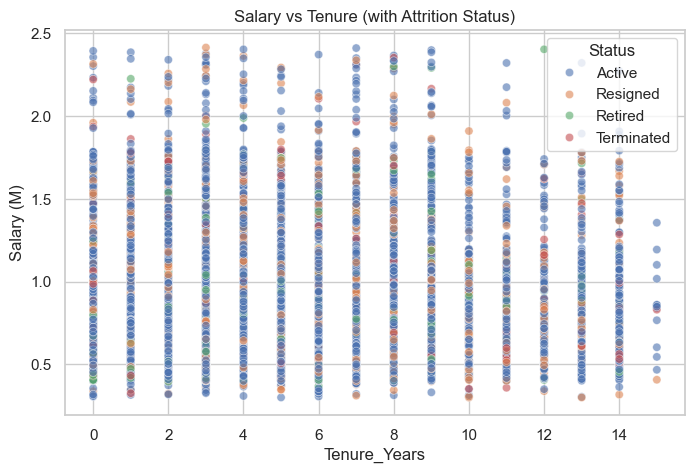

In [81]:
# 5. Salary vs Tenure (derived feature)
df["Tenure_Years"] = (pd.Timestamp.today() - df["Hire_Date"]).dt.days // 365
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Tenure_Years", y="Salary (M)", hue="Status", alpha=0.6)
plt.title("Salary vs Tenure (with Attrition Status)")
plt.show()

In [82]:
# ===============================
#  Predictive Modeling (Attrition)
# ===============================

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
# Encode Target (Attrition)
df["Attrition_Flag"] = df["Status"].apply(lambda x: 1 if x=="Resigned" else 0)

In [85]:
# Encode Categorical Features
cat_cols = ["Department", "Job_Title", "Work_Mode", "Country"]
df_encoded = df.copy()

for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [86]:
# Features & Target
features = ["Department", "Job_Title", "Work_Mode", "Experience_Years",
            "Performance_Rating", "Salary (M)", "Tenure_Years"]
X = df_encoded[features]
y = df_encoded["Attrition_Flag"]

In [87]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [88]:
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:,1]

print(" Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.79      0.46      0.58      1578
           1       0.19      0.50      0.28       402

    accuracy                           0.47      1980
   macro avg       0.49      0.48      0.43      1980
weighted avg       0.67      0.47      0.52      1980

ROC-AUC: 0.4926287447426997


In [89]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [90]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Results
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1578
           1       0.22      0.03      0.06       402

    accuracy                           0.78      1980
   macro avg       0.51      0.50      0.47      1980
weighted avg       0.68      0.78      0.71      1980

ROC-AUC: 0.5053424260194591


In [91]:
df["Attrition_Probability"] = xgb.predict_proba(X)[:,1]
print(df[["Employee_ID", "Full_Name", "Attrition_Probability"]].head(10))

        Employee_ID           Full_Name  Attrition_Probability
1828401  EMP1828402     Tracie Galloway               0.140571
1200071  EMP1200072        Amanda Smith               0.266783
194849   EMP0194850    Charles Thompson               0.159691
1629054  EMP1629055      James Williams               0.120120
191144   EMP0191145  Mr. Jeffrey Snyder               0.052356
893210   EMP0893211       Alan Williams               0.678471
1764397  EMP1764398     Patricia Fisher               0.443464
530091   EMP0530092        Melissa Barr               0.408600
1484470  EMP1484471      Savannah White               0.180661
1715848  EMP1715849      William Hodges               0.507378


In [92]:
# Feature Importance (Attrition Drivers)

In [93]:
import numpy as np
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})
coeffs["Odds_Ratio"] = np.exp(coeffs["Coefficient"])
coeffs.sort_values("Coefficient", ascending=False, inplace=True)

print(coeffs)

              Feature  Coefficient  Odds_Ratio
3    Experience_Years     0.287441    1.333011
4  Performance_Rating     0.044974    1.046000
2           Work_Mode     0.021506    1.021738
1           Job_Title    -0.000592    0.999408
0          Department    -0.000823    0.999177
5          Salary (M)    -0.060544    0.941252
6        Tenure_Years    -0.284947    0.752054


<Figure size 800x600 with 0 Axes>

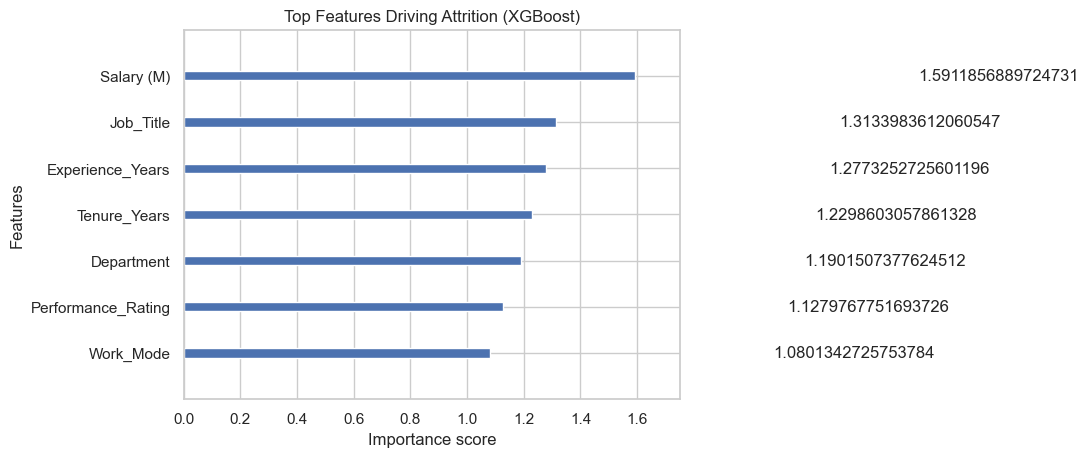

In [94]:
from xgboost import plot_importance

# Plot feature importance (Gain)
plt.figure(figsize=(8,6))
plot_importance(xgb, importance_type="gain", max_num_features=10)
plt.title("Top Features Driving Attrition (XGBoost)")
plt.show()

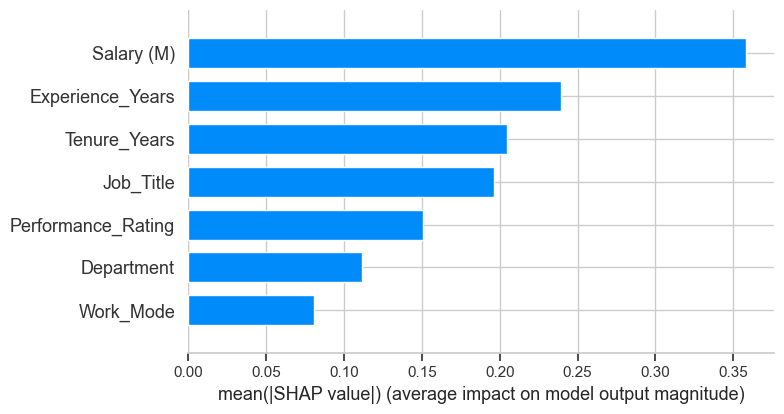

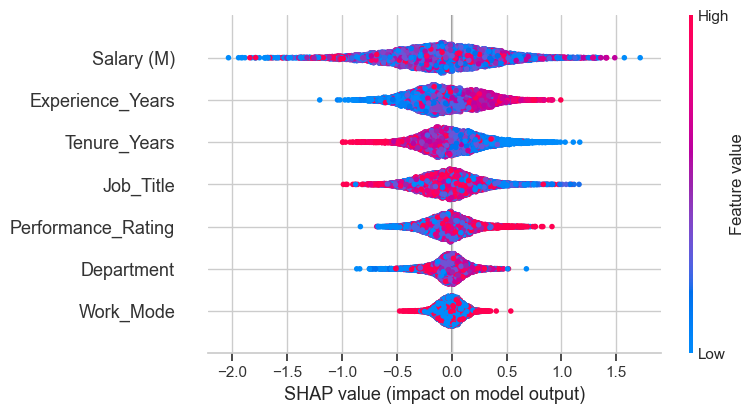

In [95]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

# Summary Plot
shap.summary_plot(shap_values, X, plot_type="bar", max_display=10)
shap.summary_plot(shap_values, X)

In [96]:
# ==============================
# Export Cleaned Dataset
# ===============================


In [97]:
# Ensure KPIs exist
df["Tenure_Years"] = (pd.Timestamp.today() - df["Hire_Date"]).dt.days // 365
df["Attrition_Flag"] = df["Status"].apply(lambda x: 1 if x == "Resigned" else 0)

# Add probability from trained XGBoost model
df["Attrition_Probability"] = xgb.predict_proba(X)[:,1]

# Select relevant columns for Power BI
export_cols = [
    "Full_Name", "Department", "Job_Title",  "Country",
    "Hire_Date", "Tenure_Years", "Experience_Years", "Performance_Rating",
    "Status", "Work_Mode", "Salary_INR",
    "Attrition_Flag", "Attrition_Probability"
]

In [98]:
df_cleaned = df[export_cols].copy()

# Save to CSV
output_file = "HR_cleaned.csv"
df_cleaned.to_csv(output_file, index=False, encoding="utf-8")

print(f"Cleaned dataset exported to {output_file} with shape {df_cleaned.shape}")

Cleaned dataset exported to HR_cleaned.csv with shape (9900, 13)
